In [2]:
import nltk
from nltk import word_tokenize
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/home/rohit/Downloads/hing/IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
reviews = df.review.str.cat(sep=' ')

In [8]:
reviews = df.review.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

194766


['the',
 ',',
 '.',
 'and',
 'a',
 'of',
 'to',
 'is',
 '/',
 '>',
 '<',
 'br',
 'in',
 'I',
 'it',
 'that',
 "'s",
 'this',
 'was',
 'The',
 'as',
 'with',
 'movie',
 'for',
 'film',
 ')',
 '(',
 'but',
 "''",
 "n't",
 '``',
 'on',
 'you',
 'are',
 'not',
 'have',
 'his',
 'be',
 '!',
 'he',
 'one',
 'at',
 'by',
 'an',
 'all',
 'who',
 'they',
 'from',
 'like',
 'It']

In [10]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/rohit/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

frequency_dist = nltk.FreqDist(tokens)
tokens = list(filter(lambda token: token not in string.punctuation, tokens))
tokens=[tokens for word in tokens if word.isalpha()]
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

[',',
 '.',
 '/',
 '>',
 '<',
 'br',
 'I',
 "'s",
 'The',
 'movie',
 'film',
 ')',
 '(',
 "''",
 "n't",
 '``',
 '!',
 'one',
 'like',
 'It',
 '?',
 'This',
 'good',
 'would',
 'time',
 'really',
 'see',
 'even',
 'story',
 "'",
 '...',
 ':',
 '-',
 'much',
 'could',
 'get',
 'people',
 'bad',
 'great',
 'well',
 'first',
 'made',
 'also',
 'make',
 'way',
 'movies',
 'But',
 'think',
 'characters',
 '*']

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/40/ad/c22887189c23cc133ae7cbad48c71312f1a962b960fe7f51fd792808a307/wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 93.7 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


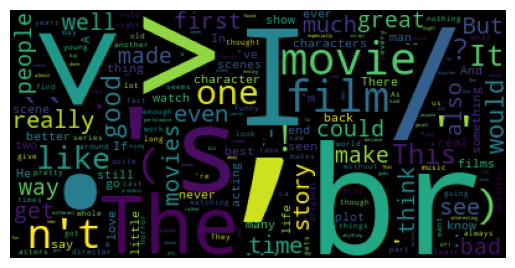

In [13]:
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
X_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(25000, 76496) (25000, 76496)


In [16]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [17]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.85884


In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [19]:
#print the confusion matrix classification report accuracy score and precision recall and f1 score
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
print(accuracy_score(y_test, predicted))

[[11108  1366]
 [ 2163 10363]]
              precision    recall  f1-score   support

    negative       0.84      0.89      0.86     12474
    positive       0.88      0.83      0.85     12526

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

0.85884
